In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

plt.style.use('default')

## Question 1

In [2]:
A = np.zeros(100).reshape(10,10)
np.fill_diagonal(A,3)
np.fill_diagonal(A[1:], 1)
np.fill_diagonal(A[:,1:], 1)

In [3]:
def jacobi(A,x0,b):
    
    D = np.zeros(100).reshape(10,10)
    np.fill_diagonal(D,A.diagonal())
    D1 = la.inv(D)
    rk = b - np.matmul(A,x0)
    xk=x0
    xk1 = x0 + np.matmul(D1,rk)
    norm = la.norm((xk1-xk),np.inf)
    
    
    i=0
    while  norm > 10e-15:
        xk = xk1
        rk = b - np.matmul(A,xk)
        xk1 = xk + np.matmul(D1,rk)
        norm = la.norm((xk1-xk),np.inf) 
        i=i+1
        
        
    return xk1,norm,i
    

In [4]:
xk1_Jacobi,norm,i = jacobi(A,x0=np.zeros(10),b = np.ones(10))

print(xk1_Jacobi)
print("Iterations =",i)

[0.27638191 0.17085427 0.21105528 0.1959799  0.20100503 0.20100503
 0.1959799  0.21105528 0.17085427 0.27638191]
Iterations = 71


## Question 2

In [5]:
def gauss_seidel(A,x0,b):
    
    E = np.tril(A)
    E1 = la.inv(E)
    rk = b - np.matmul(A,x0)
    xk=x0
    xk1 = x0 + np.matmul(E1,rk)
    norm = la.norm((xk1-xk),np.inf)
    
    
    i=0
    while  norm > 10e-15:
        xk = xk1
        rk = b - np.matmul(A,xk)
        xk1 = xk + np.matmul(E1,rk)
        norm = la.norm((xk1-xk),np.inf) 
        i=i+1
        
        
    return xk1,norm,i


In [6]:
xk1_gauss_seidel,norm,i = gauss_seidel(A,x0=np.zeros(10),b = np.ones(10))

print(xk1_gauss_seidel)
print("Iterations =",i)

[0.27638191 0.17085427 0.21105528 0.1959799  0.20100503 0.20100503
 0.1959799  0.21105528 0.17085427 0.27638191]
Iterations = 35


### The Gauss-Seidel iteration method terminates after 35 iterations which is nearly half that of the Jacobi iteration method(71). This is expected since the GS method converges twice as fast as the Jacobi method.

## Question 3

In [7]:
def SOR(A,x0,b,ω):
    
    E = np.tril(A)
    D = np.zeros(100).reshape(10,10)
    np.fill_diagonal(D,A.diagonal())
    M = la.inv( (1-ω)*D +ω*E)
    
    rk = b - np.matmul(A,x0)
    xk=x0
    xk1 = x0 + ω*np.matmul(M,rk)
    norm = la.norm((xk1-xk),np.inf)
    
    
    i=0
    while  norm > 10e-15:
        xk = xk1
        rk = b - np.matmul(A,xk)
        xk1 = xk + ω*np.matmul(M,rk)
        norm = la.norm((xk1-xk),np.inf) 
        i=i+1
        
        
    return xk1,norm,i

In [8]:
xk1,norm,i = SOR(A,x0=np.zeros(10),b = np.ones(10),ω=1.2)

print(xk1)


[0.27638191 0.17085427 0.21105528 0.1959799  0.20100503 0.20100503
 0.1959799  0.21105528 0.17085427 0.27638191]


SOR parameter with highest rate of convergence = 1.13


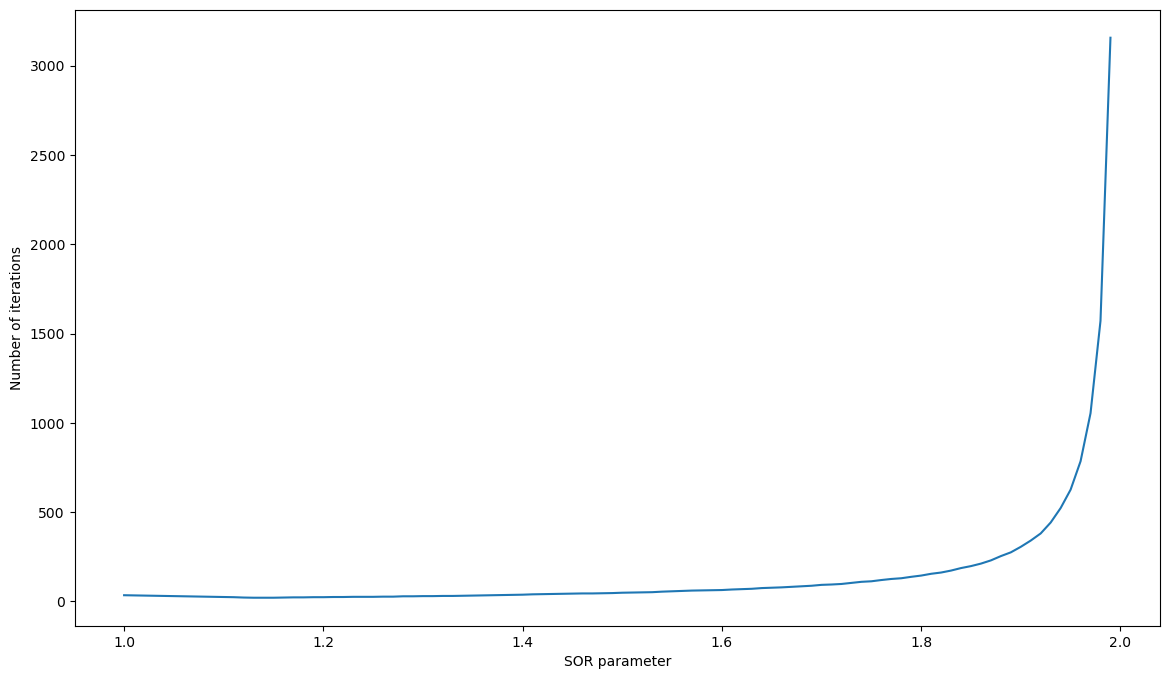

In [9]:
omega = np.linspace(1,1.99,100)
iteration = np.zeros(len(omega))

for i in range(len(omega)):
    
    xk1,norm,n = SOR(A,x0=np.zeros(10),b = np.ones(10),ω=omega[i])
    iteration[i] = n

    
fig, axes = plt.subplots(figsize=(14,8))    
plt.plot(omega,iteration)
plt.xlabel("SOR parameter")
plt.ylabel("Number of iterations")

ω_opt = omega[np.argmin(iteration)]
print("SOR parameter with highest rate of convergence =",ω_opt)

In [10]:
D = np.zeros(100).reshape(10,10)
np.fill_diagonal(D,A.diagonal())
Dinv = la.inv(D)

GJ = np.identity(10)- np.matmul(Dinv,A)

eigenvalues =np.real(la.eigvals(GJ))

ρ = max(abs(eigenvalues))
ωopt = 2/(1+np.sqrt(1-ρ**2))

print("Calculated SOR parameter =",ωopt)

Calculated SOR parameter = 1.1308019370638467


### As can be seen above the calculated SOR parameter is indeed the one with the highest rate of convergence

In [11]:
E = np.array([[2,0],[1,2]])


A = np.array([[-1,1],[1,1],[0,2]])

la.svd(A)



(array([[-0.40824829, -0.70710678, -0.57735027],
        [-0.40824829,  0.70710678, -0.57735027],
        [-0.81649658,  0.        ,  0.57735027]]),
 array([2.44948974, 1.41421356]),
 array([[-0., -1.],
        [ 1.,  0.]]))

In [12]:
J=np.array([[-39/4,0],[-2,23/4]])

j1= la.inv(J)
print(j1)

[[-0.1025641   0.        ]
 [-0.03567447  0.17391304]]
